<a href="https://colab.research.google.com/github/Ganga-dhar/cotton-disease-calssfication-using-Transfer-Learning/blob/main/cotton_disease_classification_using_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
import os
os.environ['KAGGLE_USERNAME'] = "mathyam" # username from the json file
os.environ['KAGGLE_KEY'] = "ac43c48d6cec800e4ff66f9e864fba08" # Provide your key from the json file
#!kaggle competitions download -c dogs-vs-cats # api copied from kaggle

!kaggle datasets download -d janmejaybhoi/cotton-disease-dataset

404 - Not Found


In [7]:
# Upload data and extract the contents
from zipfile import ZipFile

file_name = "/content/cotton-disease-dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [9]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Cotton Disease/train'
valid_path = '/content/Cotton Disease/test'


In [11]:
from tensorflow.keras.applications.vgg16 import VGG16

In [12]:
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 2s 0us/step


In [13]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [31]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
from glob import glob

In [16]:
# useful for getting number of output classes
folders = glob('/content/Cotton Disease/train*')

In [18]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

In [19]:
# Flatten the input
x = Flatten()(vgg16.output)

In [21]:
from tensorflow.keras.models import Model

In [32]:
prediction = Dense(4, activation='softmax')(x)

#create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [33]:
# Model Summary
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [37]:
# Compile the Model
model.compile( loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [38]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [39]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [40]:
test_set = test_datagen.flow_from_directory('/content/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [ ]:
# # Fit the model
# r = model.fit_generator( training_set,
#                          validation_data=test_set,
#                         epochs=20,
#                         steps_per_epoch=len(training_set),
#                          validation_steps=len(test_set))

In [41]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
r = model.fit_generator( training_set,
                         validation_data=test_set,
                        epochs=20,
                        steps_per_epoch=len(training_set),
                         validation_steps=len(test_set),callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 58s 937ms/step - loss: 0.6689 - accuracy: 0.7540 - val_loss: 0.4166 - val_accuracy: 0.7925

Epoch 00001: val_accuracy improved from -inf to 0.79245, saving model to vgg16_1.h5
Epoch 2/20
61/61 [==============================] - 42s 692ms/step - loss: 0.2365 - accuracy: 0.9118 - val_loss: 0.1888 - val_accuracy: 0.9434

Epoch 00002: val_accuracy improved from 0.79245 to 0.94340, saving model to vgg16_1.h5
Epoch 3/20
61/61 [==============================] - 42s 695ms/step - loss: 0.1773 - accuracy: 0.9370 - val_loss: 0.1483 - val_accuracy: 0.9623

Epoch 00003: val_accuracy improved from 0.94340 to 0.96226, saving model to vgg16_1.h5
Epoch 4/20
61/61 [==============================] - 42s 691ms/step - loss: 0.1492 - accuracy: 0.9441 - val_loss: 0.1295 - val_accuracy: 0.9434

Epoch 00004: val_accuracy did not improve from 0.96226
Epoch 5/20
61/61 [==============================] - 42s 691ms/step - loss: 0.1209 - accuracy: 0.9585 - val_loss

In [42]:
import matplotlib.pyplot as plt

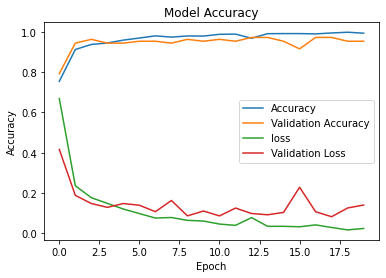

In [43]:
#Ploting Acuracy & Loss
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [44]:
#Save the model as h5 file
from tensorflow.keras.models import load_model
model.save('model_vgg16.h5')

Testing

EXAMPLE-1

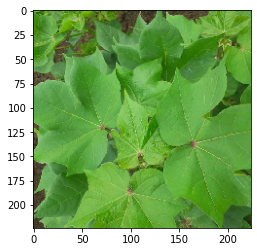

In [45]:
#Example 1

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/Cotton Disease/test/fresh cotton plant/dsd (275)_iaip.jpg', target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

In [46]:
preds

array([[1.6292088e-05, 9.3388939e-03, 8.9827580e-03, 9.8166209e-01]],
      dtype=float32)

In [47]:
preds = np.argmax(preds, axis=1)

In [48]:
if preds==0:
  print("The leaf is diseased cotton leaf")
elif preds==1:
  print("The leaf is diseased cotton plant")
elif preds==2:
  print("The leaf is fresh cotton leaf")
else:
  print("The leaf is fresh cotton plant")

The leaf is fresh cotton plant


EXAMPLE-2


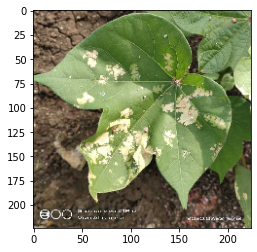

In [49]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/Cotton Disease/test/diseased cotton leaf/dis_leaf (206)_iaip.jpg', target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

In [50]:
preds

array([[9.9998415e-01, 1.2523038e-05, 3.3269569e-06, 2.9699228e-09]],
      dtype=float32)

In [51]:
preds = np.argmax(preds, axis=1)

In [52]:
if preds==0:
  print("The leaf is diseased cotton leaf")
elif preds==1:
  print("The leaf is diseased cotton plant")
elif preds==2:
  print("The leaf is fresh cotton leaf")
else:
  print("The leaf is fresh cotton plant")

The leaf is diseased cotton leaf


EXAMPLE-3

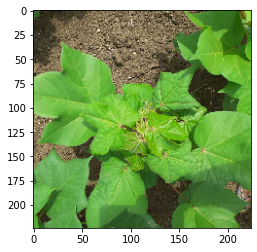

In [53]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/Cotton Disease/test/diseased cotton plant/dd (314)_iaip.jpg', target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

In [54]:
preds

array([[3.28461124e-06, 9.99817312e-01, 7.92039064e-05, 1.00117104e-04]],
      dtype=float32)

In [55]:
preds = np.argmax(preds, axis=1)

In [56]:
if preds==0:
  print("The leaf is diseased cotton leaf")
elif preds==1:
  print("The leaf is diseased cotton plant")
elif preds==2:
  print("The leaf is fresh cotton leaf")
else:
  print("The leaf is fresh cotton plant")

The leaf is diseased cotton plant


EXAMPLE-4

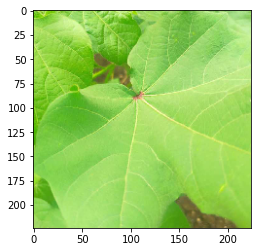

In [57]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/Cotton Disease/test/fresh cotton leaf/d (329)_iaip.jpg', target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

In [58]:
preds

array([[5.9573308e-06, 1.3661264e-07, 9.9998820e-01, 5.6907843e-06]],
      dtype=float32)

In [59]:
preds = np.argmax(preds, axis=1)

In [60]:
if preds==0:
  print("The leaf is diseased cotton leaf")
elif preds==1:
  print("The leaf is diseased cotton plant")
elif preds==2:
  print("The leaf is fresh cotton leaf")
else:
  print("The leaf is fresh cotton plant")

The leaf is fresh cotton leaf
